In [1]:
import numpy as np
import matplotlib.pyplot as plt
import oritelib as orite
from copy import deepcopy


In [4]:
sequence = "ATTGCTAGGCAAGCTTCAAATCTTTCAGGCATGCAAATGCATGCATTACGATACGCTAGCGCGAGCCTATACAACTCAGATTCTACTATATC"
sequence = orite.seq_from_fasta('test_data/eco_k12.fasta')


In [5]:
kmer = ""
kmer_length = 3
kmer_dict = {}
extended_sequence = sequence + sequence[0:kmer_length-1]
for i in range(len(sequence)):
    kmer = extended_sequence[i:(i+kmer_length)]
    
    if kmer in kmer_dict:
        value_list = kmer_dict[kmer]
        value_list[0] = value_list[0]+1
        value_list.append(i)
        kmer_dict[kmer] = value_list
        
    else:
        kmer_dict.update({kmer: [1,i]})
        

In [6]:
'''
sequence: string of genome sequence
kmer_length: int on how long kmers to look for
circular: Boolean, True by default. Use False if genome is not circular or if a subsequence is used

Output: A list of tuples. First element in tuple represents the kmer (String), the other elelment is a list. The first element in the list 
represents how many occurences there are of the kmer in the investigated sequence. The following indices store the 
positions on which the first base in the kmer is located on the sequence. The tuple are based in descending order 
by how many occurences there are of the kmer in the sequence. 
''' 
def get_kmers(sequence, kmer_length, circular = True):
    kmer = ""
    kmer_dict = {}
    sequence_length = len(sequence)
    
    if circular:
        sequence = sequence + sequence[0:kmer_length-1]
        
        for i in range(sequence_length):
            kmer = sequence[i:(i+kmer_length)]

            if kmer in kmer_dict:
                value_list = kmer_dict[kmer]
                value_list[0] = value_list[0]+1
                value_list.append(i)
                kmer_dict[kmer] = value_list

            else:
                kmer_dict.update({kmer: [1,i]})
    else: 
        for i in range(sequence_length-(kmer_length-1)):
            kmer = sequence[i:(i+kmer_length)]

            if kmer in kmer_dict:
                value_list = kmer_dict[kmer]
                value_list[0] = value_list[0]+1
                value_list.append(i)
                kmer_dict[kmer] = value_list

            else:
                kmer_dict.update({kmer: [1,i]})
    
    kmer_dict = sorted(kmer_dict.items(), key = 
             lambda kv:(kv[1], kv[0]), reverse = True)
    
    return kmer_dict

In [7]:
x = get_kmers(sequence, 9, circular=False)

In [8]:
x_list = x[0:20]

In [9]:
for i in x_list:
    print(i[0])

CAGCGCCAG
CCAGCGCCA
GCGCTGGCG
CTGGCGCTG
TGGCGCTGG
CGCTGGCGG
CGCCAGCGC
GGCGCTGGC
CGCCAGCAG
GCCAGCGCC
CCGCCAGCA
CCGCCAGCG
CGCTGGCGC
CGCCGCCAG
CAGCGCCTG
CTGGCGGCG
GCCGCCAGC
GCTGGCGCG
CAGGCGCTG
AGCGCCAGC


In [10]:
'''
kmer_list: A list of tuples. First element in tuple represents the kmer (String), the other elelment is a list. The first element in the list 
represents how many occurences there are of the kmer in the investigated sequence. The following indices store the 
positions on which the first base in the kmer is located on the sequence. The tuple are based in descending order 
by how many occurences there are of the kmer in the sequence. 

n: Number of tuples to return

Output: A list of the n tuples with kmers that occured the most in a sequence
'''
def get_top_n_kmers(kmer_list, n):
    return deepcopy(kmer_list[0:n])

In [11]:
'''
kmer_list: A tuple. First element represents the kmer (String), the other elelment is a list. The first element in the list 
represents how many occurences there are of the kmer in the investigated sequence. The following indices store the 
positions on which the first base in the kmer is located on the sequence. The tuple are based in descending order 
by how many occurences there are of the kmer in the sequence. 

n: A threshold for how many times a kmer must occur in a sequence for it to be considered relevant

Output: A list of the tuples with kmers that occured more or equal to n number of times in the sequence
'''

def get_kmer_by_occurence(kmer_list, n):
    new_kmer_list = []
    for i in range(len(kmer_list)):
        if (kmer_list[i][1][0] >= n):
            new_tuple = deepcopy(kmer_list[i])
            new_kmer_list.append(new_tuple)
    return new_kmer_list
        

In [13]:
top_kmer = get_top_n_kmers(x_list, 10)

In [14]:
print(top_kmer)

[('CAGCGCCAG', [260, 11488, 35309, 58979, 61771, 65552, 68740, 72573, 73185, 113267, 114046, 137889, 197881, 206037, 238393, 262713, 342105, 394158, 406966, 408232, 409654, 458746, 495357, 500296, 510213, 523442, 597439, 600938, 642322, 657826, 661476, 664615, 690977, 692933, 718017, 775883, 778969, 781233, 786851, 795716, 800005, 809870, 813553, 815746, 835630, 848693, 856507, 873548, 889278, 897859, 931922, 959410, 980289, 982676, 1022705, 1034573, 1040277, 1056162, 1119594, 1120998, 1157889, 1236535, 1236919, 1239447, 1253609, 1258258, 1277888, 1290611, 1293572, 1339584, 1355115, 1381461, 1384346, 1411522, 1418407, 1433758, 1451178, 1472955, 1483595, 1491613, 1517635, 1542292, 1543008, 1546951, 1551280, 1551987, 1591201, 1606441, 1616581, 1631891, 1662033, 1684764, 1699985, 1712442, 1740816, 1794209, 1794443, 1800743, 1814956, 1874257, 1891922, 1904628, 1907684, 1937831, 1948401, 1995948, 2000142, 2011247, 2092480, 2101050, 2109477, 2111172, 2111346, 2125342, 2126616, 2141069, 21624

In [115]:
kmer_positions = [] 
for my_tuple in top_kmer:
    kmer_positions.append(my_tuple[1][1:])

In [116]:
gc_skew = orite.gc_skew_sliding_window(sequence, window_rad= 10000)

In [117]:
gc_cum = orite.cumilative_skew(gc_skew)

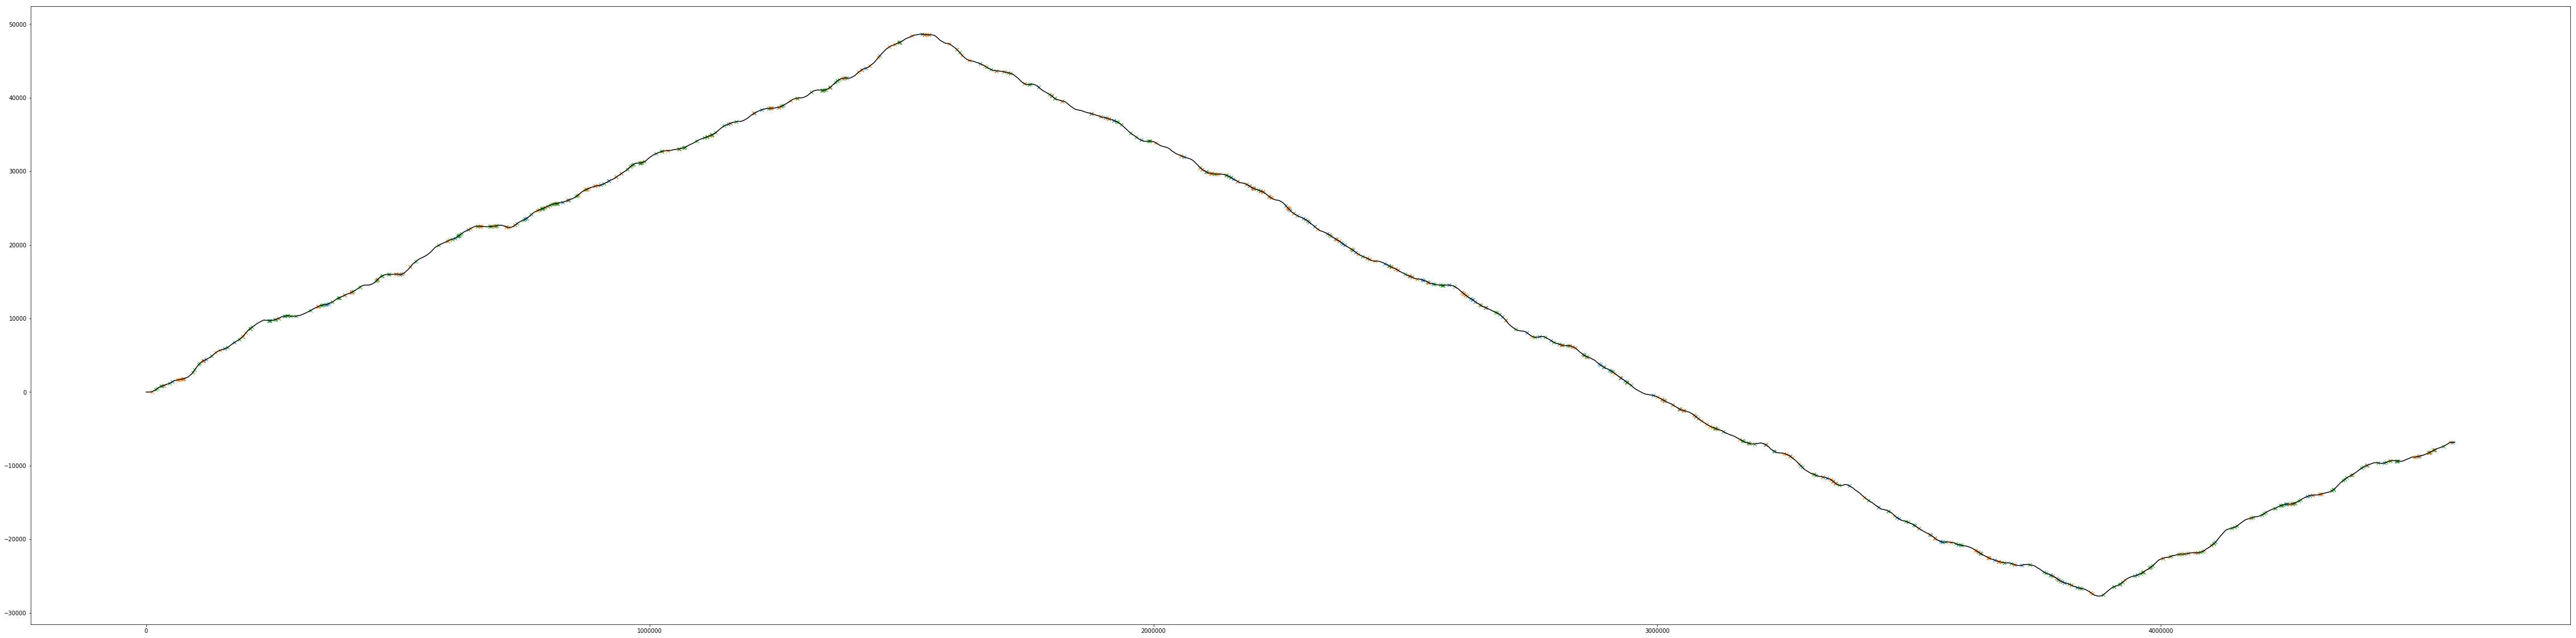

In [119]:
plt.figure(figsize = [80,20])
plt.plot(kmer_positions[0],gc_cum[kmer_positions[0]], 'x')
plt.plot(kmer_positions[1],gc_cum[kmer_positions[1]], 'x')
plt.plot(kmer_positions[2],gc_cum[kmer_positions[2]], 'x')
#plt.plot(kmer_positions[3],gc_cum[kmer_positions[3]], 'x')
#plt.plot(kmer_positions[4],gc_cum[kmer_positions[4]], 'x')
#plt.plot(kmer_positions[5],gc_cum[kmer_positions[5]], 'x')
#plt.plot(kmer_positions[6],gc_cum[kmer_positions[6]], 'x')
#plt.plot(kmer_positions[7],gc_cum[kmer_positions[7]], 'x')
#plt.plot(kmer_positions[8],gc_cum[kmer_positions[8]], 'x')
#plt.plot(kmer_positions[9],gc_cum[kmer_positions[9]], 'x')

plt.plot(gc_cum, 'k')